- 계단함수
- 시그모이드 함수
- 렐루 함수
- 소프트맥스 함수

In [22]:
import numpy as np
import matplotlib.pylab as plt

In [23]:
def step(x):
    y = x > 0
    return np.array(x>0, dtype=int)

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [25]:
def relu(x):
    return np.maximum(0, x)

In [26]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

## 그래프 구현 ▽

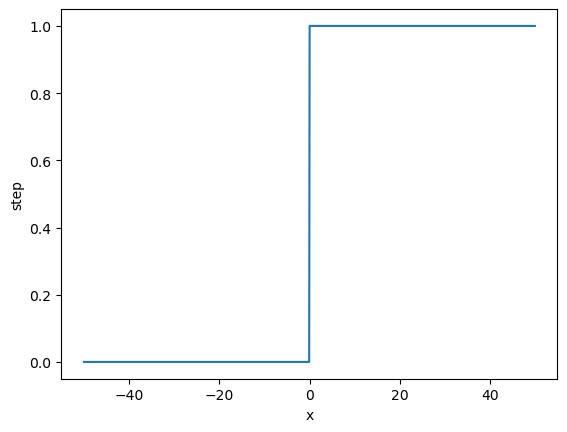

In [43]:
x = np.arange(-50.0, 50.0, 0.1)
y = step(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("step")
plt.show()

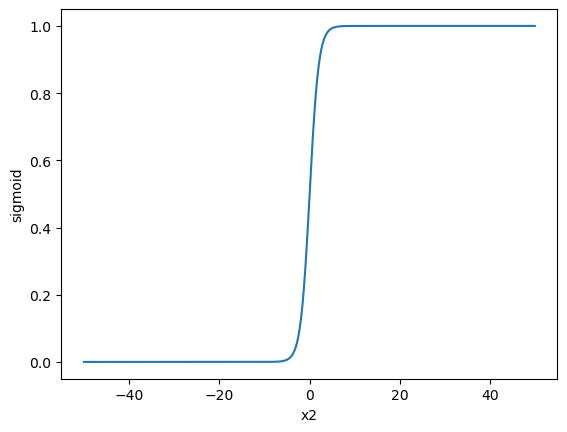

In [42]:
x2 = np.arange(-50.0, 50.0, 0.1)
y2 = sigmoid(x2)
plt.plot(x2, y2)
plt.xlabel("x2")
plt.ylabel("sigmoid")
plt.show()

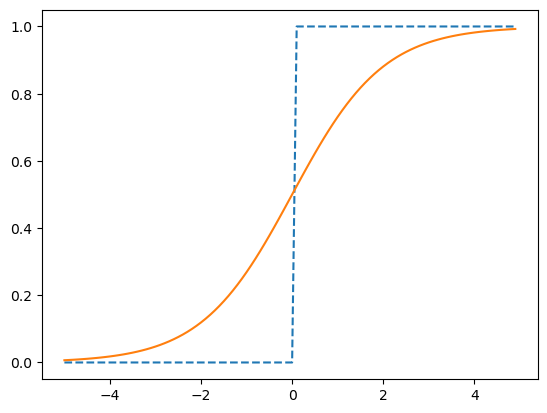

In [29]:
plt.plot(x, y, "--")
plt.plot(x2, y2)
plt.show()

----

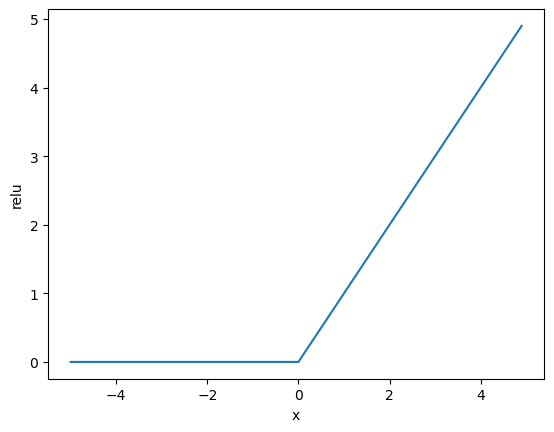

In [30]:
relux = np.arange(-5.0, 5.0, 0.1)
reluy = relu(relux)
plt.plot(relux, reluy)
plt.xlabel("x")
plt.ylabel("relu")
plt.show()

#### 생각난 질문 0 : 계단함수와 시그모이드 함수의 차이점과, 시그모이드 함수를 사용하는 이유는?

```
시그모이드의 값을 늘리면 마치 계단 함수와 똑같은 그래프의 형태를 띈다.
물론 그렇게 보일 뿐이지, 계단함수는 0과 1만을, 시그모이드 함수는 그 사이 값이 매우 작고 많이 있기에 그런 현상이 나타나는 것이겠지만
시그모이드를 사용하는 이유는 학습을 올바른 방향으로 나아가기 위함일 것이다. 
즉 미분을 하기 위해서는 단순히 0과 1의 변화가 아닌 0.01에서 0.03으로 변화하는 수치가 필요하기 때문이다.
```

In [32]:
a = np.arange(1, 101, 1)
b = np.arange(101, 201, 1)

In [33]:
c = np.array([a, b])

In [34]:
a-100

array([-99, -98, -97, -96, -95, -94, -93, -92, -91, -90, -89, -88, -87,
       -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74,
       -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61,
       -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48,
       -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35,
       -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22,
       -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,
        -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0])

In [35]:
c

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100],
       [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 17

#### 질문1 : 신경망 계산에서 행렬을 사용하는 이유와 이점은?

```
신경망 각 층을 계산하는데 행렬을 사용하는 이유와 이점에 대한 질문이다.
아마도 수학적으로 편리하고 빠르게 계산할 수 있기 때문일 것이다.
또한 numpy라는 편한 라이브러리를 사용하기도 하고.
또 각 층에서 모든 노드 하나 씩 계산하는 것 보다 
행렬을 통해 한 층을 한번에 계산하는 편이 훨씬 어느면에서나 이득일 것으로 생각한다.
```

## 3층 신경망 ▽

In [37]:
w = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
w2 = np.array([[0.1, 0.4], [0.2, 0.5],  [0.3, 0.6]])
w3 = np.array([[0.1, 0.3], [0.2, 0.5]])

x = np.array([1, 0.5])

b = np.array([0.1, 0.2, 0.3])
b2 = np.array([0.1, 0.2])
b3 = np.array([0.1, 0.2])

In [38]:
# 입력층
print(x)
print(x.shape)

[1.  0.5]
(2,)


In [39]:
#은닉층 1
y = np.dot(x, w) + b
y = sigmoid(y)
y

array([0.57444252, 0.66818777, 0.75026011])

In [40]:
#은닉층 2
y2 = np.dot(y, w2) + b2
y2 = sigmoid(y2)
y2

array([0.62624937, 0.7710107 ])

In [41]:
# 출력층
y3 = np.dot(y2, w3) + b3
y3

array([0.31682708, 0.77338016])